In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision
import tqdm

import dataloaders
import utils
from trainer import Trainer

torch.random.manual_seed(0)
np.random.seed(0)

<Figure size 720x432 with 0 Axes>

### Dataset

In [2]:
# Load the dataset and print some stats
batch_size = 64

image_transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
    ]
)

dataloader_train, dataloader_test = dataloaders.load_dataset(
    batch_size, image_transform
)
example_images, _ = next(iter(dataloader_train))
print(
    f"The tensor containing the images has shape: {example_images.shape} (batch size, number of color channels, height, width)",
    f"The maximum value in the image is {example_images.max()}, minimum: {example_images.min()}",
    sep="\n\t",
)

The tensor containing the images has shape: torch.Size([64, 1, 28, 28]) (batch size, number of color channels, height, width)
	The maximum value in the image is 1.0, minimum: 0.0


In [3]:
def create_model():
    """
    Initializes the mode. Edit the code below if you would like to change the model.
    """
    model = nn.Sequential(
        nn.Flatten(),  # Flattens the image from shape (batch_size, C, Height, width) to (batch_size, C*height*width)
        nn.Linear(28 * 28 * 1, 10)
        # No need to include softmax, as this is already combined in the loss function
    )
    # Transfer model to GPU memory if a GPU is available
    model = utils.to_cuda(model)
    return model


model = create_model()

In [4]:
# Test if the model is able to do a single forward pass
example_images = utils.to_cuda(example_images)
output = model(example_images)
print("Output shape:", output.shape)
expected_shape = (batch_size, 10)  # 10 since mnist has 10 different classes
assert (
    output.shape == expected_shape
), f"Expected shape: {expected_shape}, but got: {output.shape}"

Output shape: torch.Size([64, 10])


### Hyperparameters & Loss function

In [5]:
# Hyperparameters
learning_rate = 0.0192
num_epochs = 5


# Use CrossEntropyLoss for multi-class classification
loss_function = torch.nn.CrossEntropyLoss()

# Define optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Train model

In [6]:
trainer = Trainer(
    model=model,
    dataloader_train=dataloader_train,
    dataloader_test=dataloader_test,
    batch_size=batch_size,
    loss_function=loss_function,
    optimizer=optimizer,
)
train_loss_dict, test_loss_dict = trainer.train(num_epochs)

Training epoch 4: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:09<00:00, 101.53it/s]


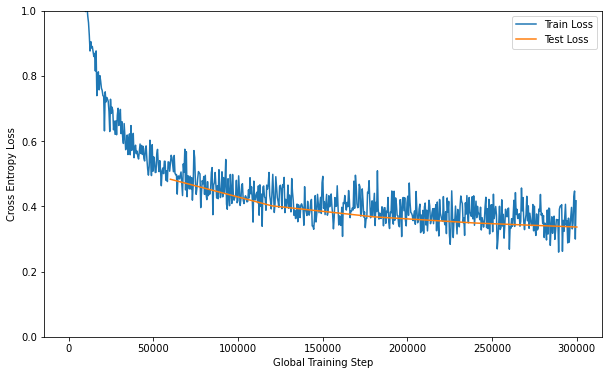

Final Test loss: 0.2040701179652457. Final Test accuracy: 0.9404


In [19]:
# We can now plot the training loss with our utility script

# Plot loss
utils.plot_loss(train_loss_dict, label="Train Loss")
utils.plot_loss(test_loss_dict, label="Test Loss")
# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
plt.savefig("image_solutions/task_4a.png")

plt.show()

torch.save(model.state_dict(), "saved_model.torch")
final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_test, model, loss_function
)
print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")

## Plotting example

In [8]:
# You can delete the remaining code of this notebook, as this is just to illustrate one method to solve the assignment tasks.


# This example code is here to illustrate how you can plot two different models to compare them.
# Lets change a small part of our model: the number of epochs trained (NOTE, use 5 epochs for your experiments in the assignment.)

# We reset the manual seed to 0, such that the model parameters are initialized with the same random number generator.
torch.random.manual_seed(0)
np.random.seed(0)


dataloader_train, dataloader_test = dataloaders.load_dataset(
    batch_size, image_transform
)
model = create_model()

learning_rate = 0.0192
num_epochs = 6

# Redefine optimizer, as we have a new model.
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
trainer = Trainer(
    model=model,
    dataloader_train=dataloader_train,
    dataloader_test=dataloader_test,
    batch_size=batch_size,
    loss_function=loss_function,
    optimizer=optimizer,
)
train_loss_dict_6epochs, test_loss_dict_6epochs = trainer.train(num_epochs)
num_epochs = 5

Training epoch 5: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:09<00:00, 99.24it/s]


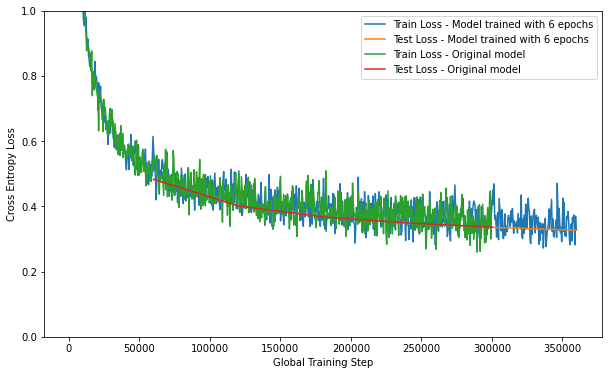

Final Test loss: 0.2040701179652457. Final Test accuracy: 0.9404


In [23]:
# We can now plot the two models against eachother

# Plot loss
utils.plot_loss(
    train_loss_dict_6epochs, label="Train Loss - Model trained with 6 epochs"
)
utils.plot_loss(test_loss_dict_6epochs, label="Test Loss - Model trained with 6 epochs")
utils.plot_loss(train_loss_dict, label="Train Loss - Original model")
utils.plot_loss(test_loss_dict, label="Test Loss - Original model")
# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")

fig = plt.gcf().set_size_inches(10, 6)

plt.savefig("image_solutions/task_4a.png")

plt.show()

torch.save(model.state_dict(), "saved_model.torch")
final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_test, model, loss_function
)
print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")

### Task A

#### Without normalization

In [10]:
image_transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
    ]
)

dataloader_train, dataloader_test = dataloaders.load_dataset(
    batch_size, image_transform
)

model = create_model()

loss_function = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

trainer = Trainer(
    model=model,
    dataloader_train=dataloader_train,
    dataloader_test=dataloader_test,
    batch_size=batch_size,
    loss_function=loss_function,
    optimizer=optimizer,
)

train_loss, test_loss = trainer.train(num_epochs)

Training epoch 4: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:09<00:00, 100.44it/s]


#### With normalization

In [31]:
image_transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(mean=0.5, std=0.5),
    ]
)

dataloader_train, dataloader_test = dataloaders.load_dataset(
    batch_size, image_transform
)

model = create_model()

loss_function = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

trainer = Trainer(
    model=model,
    dataloader_train=dataloader_train,
    dataloader_test=dataloader_test,
    batch_size=batch_size,
    loss_function=loss_function,
    optimizer=optimizer,
)

train_loss_normalized, test_loss_normalized = trainer.train(num_epochs)

Training epoch 4: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:14<00:00, 64.18it/s]


#### Plots

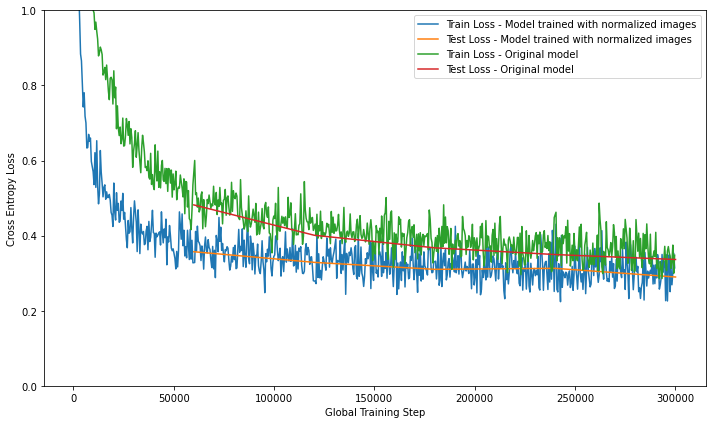

In [28]:
# We can now plot the two models against eachother

# Plot loss
utils.plot_loss(
    train_loss_normalized, label="Train Loss - Model trained with normalized images"
)
utils.plot_loss(
    test_loss_normalized, label="Test Loss - Model trained with normalized images"
)
utils.plot_loss(train_loss, label="Train Loss - Original model")
utils.plot_loss(test_loss, label="Test Loss - Original model")
# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")

fig = plt.gcf().set_size_inches(10, 6)
plt.tight_layout()

plt.savefig("image_solutions/task_4a.png")

plt.show()

### Task B

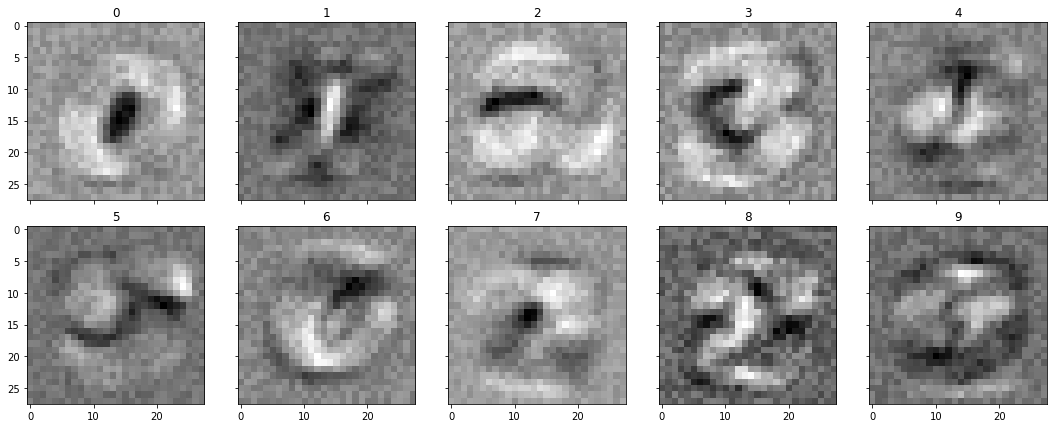

In [32]:
weight = list(model.children())[1].weight.cpu().data

fig, axs = plt.subplots(2, 5, sharex=True, sharey=True, figsize=(15, 6))
for i in range(10):
    axs[i // 5, i % 5].imshow(weight[i].reshape((28, 28)), cmap="gray")
    axs[i // 5, i % 5].set_title(i)
fig.tight_layout()
fig.savefig("image_solutions/task_4b.png")

### Task C

In [14]:
learning_rate = 1.0

image_transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(mean=0.5, std=0.5),
    ]
)

dataloader_train, dataloader_test = dataloaders.load_dataset(
    batch_size, image_transform
)

model = create_model()

loss_function = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

trainer = Trainer(
    model=model,
    dataloader_train=dataloader_train,
    dataloader_test=dataloader_test,
    batch_size=batch_size,
    loss_function=loss_function,
    optimizer=optimizer,
)

train_loss_lr1, test_loss_lr1 = trainer.train(num_epochs)

Training epoch 4: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:14<00:00, 63.26it/s]


Final Test loss: 0.2040701179652457. Final Test accuracy: 0.9404


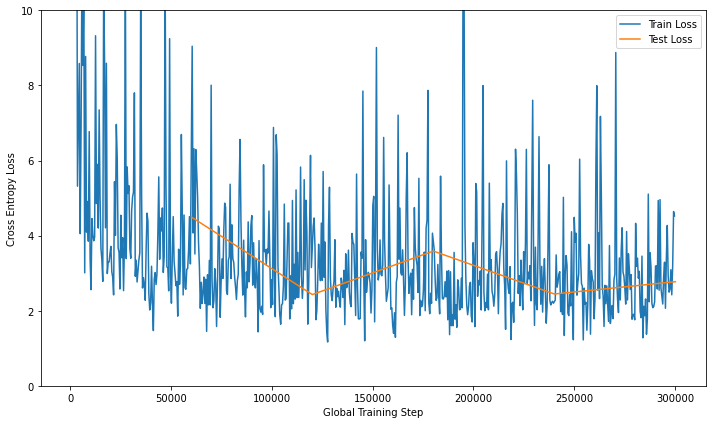

In [27]:
# Plot loss
utils.plot_loss(train_loss_lr1, label="Train Loss")
utils.plot_loss(test_loss_lr1, label="Test Loss")
# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, 10])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")

fig = plt.gcf().set_size_inches(10, 6)
plt.tight_layout()

plt.savefig("image_solutions/task_4c.png")

final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_test, model, loss_function
)
print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")

plt.show()

### Task D

In [16]:
learning_rate = 0.0192

image_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=0.5, std=0.5),
])

dataloader_train, dataloader_test = dataloaders.load_dataset(batch_size, image_transform)

model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)
model = utils.to_cuda(model)

loss_function = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(),
                            lr=learning_rate)

trainer = Trainer(
    model=model,
    dataloader_train=dataloader_train,
    dataloader_test=dataloader_test,
    batch_size=batch_size,
    loss_function=loss_function,
    optimizer=optimizer
)

train_loss_deep, test_loss_deep = trainer.train(num_epochs)

Training epoch 4: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 938/938 [00:15<00:00, 61.82it/s]


#### Plots

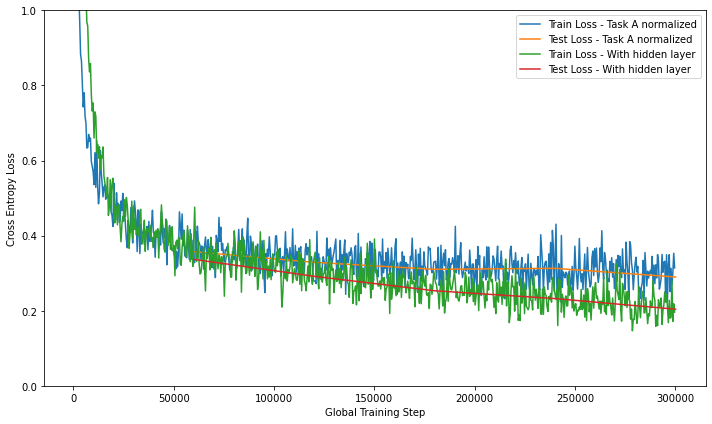

In [29]:
# We can now plot the two models against eachother

# Plot loss
utils.plot_loss(train_loss_normalized, label="Train Loss - Task A normalized")
utils.plot_loss(test_loss_normalized, label="Test Loss - Task A normalized")
utils.plot_loss(train_loss_deep, label="Train Loss - With hidden layer")
utils.plot_loss(test_loss_deep, label="Test Loss - With hidden layer")
# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")

fig = plt.gcf().set_size_inches(10, 6)
plt.tight_layout()

plt.savefig("image_solutions/task_4d.png")

plt.show()